# Data PreProcessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing packagesimport pandas as pd
import pandas as pd
import csv
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
##Loading csv files
path = r'/content/drive/MyDrive/ColabNotebooks/Lisboa_Estancia/Mocap_Trials/all_Mocapsamples_8people.csv'

df= pd.read_csv(path, skiprows=1, usecols=[0,1,2,3,4,5,6,7], names=['Trial_number','x1', 'y1', 'z1','x2', 'y2', 'z2','label'])
print (df.info)
print(df.shape)

#label outputs (y) Activities
y = pd.read_csv(path, usecols= [7])
print("y = \n",y)
print(y.shape)

#Standarizing
x = []
scaler = StandardScaler()
x = scaler.fit_transform(df)
x = pd.DataFrame(data = df, columns = ['x1','y1','z1','x2','y2','z2'])
print("x = \n",x)
print(x.shape)

#Verifying data shape
x.shape, y.shape

#Counting number of samples per activity
y['label'].value_counts()

<bound method DataFrame.info of         Trial_number        x1        y1  ...        y2        z2  label
0                  1  2.567156 -1.651635  ... -8.051603  3.286658      0
1                  1  3.076574 -1.746254  ... -6.760365  2.431046      0
2                  1  3.463136 -1.829073  ... -5.450151  1.740691      0
3                  1  3.788543 -1.879726  ... -4.194374  1.144632      0
4                  1  4.081213 -1.854936  ... -3.002554  0.474182      0
...              ...       ...       ...  ...       ...       ...    ...
247799            16  0.389593 -0.836993  ... -0.026707  0.025357      2
247800            16  0.616373 -1.022211  ... -0.010827  0.031253      2
247801            16  0.706496 -1.130110  ...  0.006784  0.036765      2
247802            16  0.650840 -1.202800  ...  0.021199  0.042171      2
247803            16  0.595183 -1.275490  ...  0.035613  0.047576      2

[247804 rows x 8 columns]>
(247804, 8)
y = 
         label
0           0
1           0
2   

1    96040
2    89037
0    62727
Name: label, dtype: int64

## Create train and test subdatasets

In [ ]:
### Convert labels from [1,2,3] to [0,1,2]  Do it just in case the values starts in 1.
####y = y - 1
#print(y)

        label
0           0
1           0
2           0
3           0
4           0
...       ...
380264      2
380265      2
380266      2
380267      2
380268      2

[380269 rows x 1 columns]


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(198243, 6) (49561, 6)
(198243, 1) (49561, 1)


## Graphics

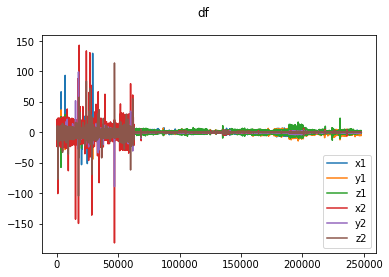

Loaded 247804 subjects


In [ ]:
name = 'df'
columns_names = ['x1','y1','z1','x2','y2','z2']
#plt.plot(df[name])
plt.plot(x)
plt.suptitle(name)
plt.legend(columns_names)
plt.show()

# plot the x, y, z acceleration and activities for multiple subjects
def plot_subject(subject):
	plt.figure()
	# create a plot for each column
	for col in range(subject.shape[0]):
		plt.subplot(subject.shape[0], 1, col+1)
		plt.plot(subject[:,col])
	plt.show()

# load
subjects = df
print('Loaded %d subjects' % len(subjects))


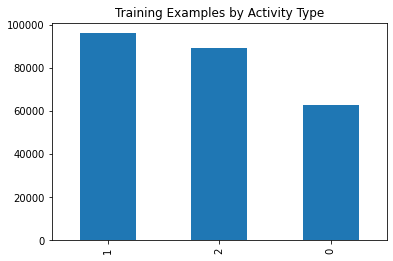

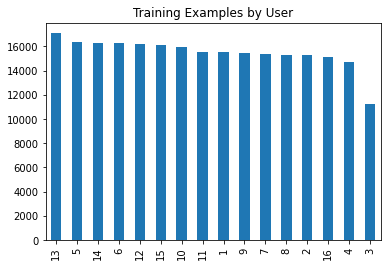

In [ ]:
#Graphics
# Show how many training examples exist for each of the six activities
df['label'].value_counts().plot(kind='bar', title='Training Examples by Activity Type')
plt.show()
# Better understand how the recordings are spread across the different
# users who participated in the study
df['Trial_number'].value_counts().plot(kind='bar', title='Training Examples by User')
plt.show()

#Sliding Window Proccessing

In [ ]:
print(df.head())
print(df.shape)
#df.loc[3,"y2"]
df.loc[2:4]

dataset_size = df.shape[0] ### how many rows
window_size = 100 ### how many time steps we want to process simultaneously

xx = np.array([ x.loc[i:(i+window_size-1)].values for i in range(dataset_size-window_size) ])
#print(xx[0:5])
print("shape(xx) = ", xx.shape)


yy = np.array([ y.loc[i].values for i in range(dataset_size-window_size) ])
#print(yy[0:5])
print("shape(yy) = ", yy.shape)

   Trial_number        x1        y1  ...        y2        z2  label
0             1  2.567156 -1.651635  ... -8.051603  3.286658      0
1             1  3.076574 -1.746254  ... -6.760365  2.431046      0
2             1  3.463136 -1.829073  ... -5.450151  1.740691      0
3             1  3.788543 -1.879726  ... -4.194374  1.144632      0
4             1  4.081213 -1.854936  ... -3.002554  0.474182      0

[5 rows x 8 columns]
(247804, 8)
shape(xx) =  (247704, 100, 6)
shape(yy) =  (247704, 1)


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)
X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size = 0.2)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(198163, 100, 6) (49541, 100, 6)
(198163, 1) (49541, 1)


# **Basic DNN Archicture**

## TODO:

* **Add more subjects/data**
* **Use several frames simultaneously (sliding window part)**
* **Change the layer parameters (number of units per layer, number of layers)**
* **Change the network to a RNN network**
* **Check if the classification implementation and parameters are being done correctly**

**Read:**
* https://www.tensorflow.org/guide/keras/rnn
* https://www.tensorflow.org/tutorials/text/text_classification_rnn
* https://www.tensorflow.org/tutorials/images/classification

https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
https://towardsdatascience.com/human-activity-recognition-har-tutorial-with-keras-and-core-ml-part-1-8c05e365dfa0

#### Load Tensorflow libraries

In [ ]:
import tensorflow as tf
import tensorflow.keras
import tensorflow.keras.backend as K

print(tf.version.VERSION)
print(tf.keras.__version__)

2.4.1
2.4.0


#### Build network

input_dim =  (100, 6)
num_classes =  3
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100, 32)           224       
_________________________________________________________________
dense_1 (Dense)              (None, 100, 32)           1056      
_________________________________________________________________
dense_2 (Dense)              (None, 100, 32)           1056      
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 9603      
Total params: 11,939
Trainable params: 11,939
Non-trainable params: 0
_________________________________________________________________
None


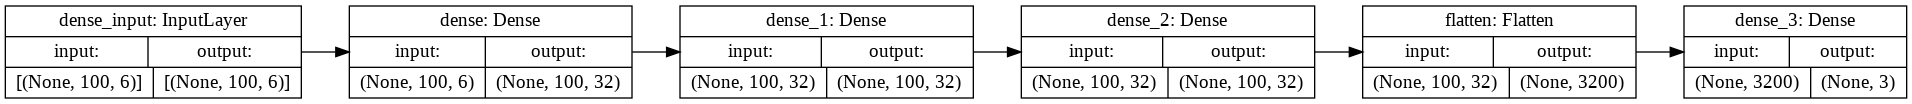

In [ ]:
input_dim = X_train.shape[1:] # number of columns/variables/features : 2x3 = 6
num_classes = np.unique(y_train).shape[0]

print("input_dim = ", input_dim)
print("num_classes = ", num_classes)

### https://www.tensorflow.org/api_docs/python/tf/keras/losses
loss_function = 'sparse_categorical_crossentropy'

### https://www.tensorflow.org/api_docs/python/tf/keras/metrics
score_function = 'sparse_categorical_accuracy'

### https://www.tensorflow.org/api_docs/python/tf/keras/activations
activation_function = 'relu'

### https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
optimizer_function = 'adam'


K.clear_session()

### Basic DNN with 4 fully connected (Dense) layers with dimensions: 6,5,4,3
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=input_dim, activation=activation_function))
model.add(tf.keras.layers.Dense(32, activation=activation_function))
model.add(tf.keras.layers.Dense(32, activation=activation_function))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(num_classes,activation='softmax')) ### TODO: Confirm this!

model.compile(optimizer=optimizer_function, loss=loss_function, metrics=[score_function])

# Plotting model
plot = tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='LR')
print(model.summary())
plot

## Train network

In [ ]:
batch_size = 64
epochs = 50
###100

# This callback will stop the training when there is no improvement in the validation loss for x number of consecutive epochs.
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

start_time = time.perf_counter()

# Fitting model
result = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, shuffle=False, validation_data=(X_test, y_test), callbacks=[callback])

#Validationsplit I took 20% of the train data for validation. I will keep it xtest and y test for prediction...
#result = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, shuffle=False, validation_split=0.2, callbacks=[callback])

end_time = time.perf_counter()
run_time = (end_time - start_time)
print( "time = " + str(int(run_time)) + " s = " + str(int(run_time//60)) + " mins" )

Epoch 1/50
3097/3097 [==============================] - 35s 11ms/step - loss: 0.1836 - sparse_categorical_accuracy: 0.9282 - val_loss: 0.0605 - val_sparse_categorical_accuracy: 0.9799
Epoch 2/50
3097/3097 [==============================] - 33s 11ms/step - loss: 0.0558 - sparse_categorical_accuracy: 0.9822 - val_loss: 0.0367 - val_sparse_categorical_accuracy: 0.9870
Epoch 3/50
3097/3097 [==============================] - 32s 10ms/step - loss: 0.0341 - sparse_categorical_accuracy: 0.9885 - val_loss: 0.0253 - val_sparse_categorical_accuracy: 0.9908
Epoch 4/50
3097/3097 [==============================] - 32s 10ms/step - loss: 0.0238 - sparse_categorical_accuracy: 0.9918 - val_loss: 0.0188 - val_sparse_categorical_accuracy: 0.9926
Epoch 5/50
3097/3097 [==============================] - 32s 10ms/step - loss: 0.0163 - sparse_categorical_accuracy: 0.9942 - val_loss: 0.0142 - val_sparse_categorical_accuracy: 0.9947
Epoch 6/50
3097/3097 [==============================] - 32s 10ms/step - loss: 0.

## Plot results

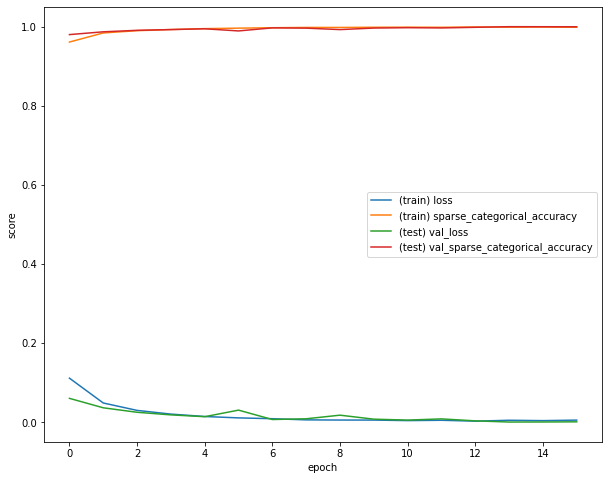

In [ ]:
datafolder = '/content/drive/MyDrive/ColabNotebooks/Lisboa_Estancia/Mocap_Trials/'
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot(111)
for key in result.history :
  #if key == "loss" or key == "val_loss": continue
  label = ("(test) " if key.startswith("val_") else "(train) ") + key
  plt.plot(result.history[key], label=label)
#ax.set(ylim=[-0.1, 1.1])no h
ax.set(xlabel="epoch", ylabel="score")
ax.legend()
plt.show()
fig.savefig(datafolder + "plot-train_test_loss_metrics_1_DNN_8people.png")

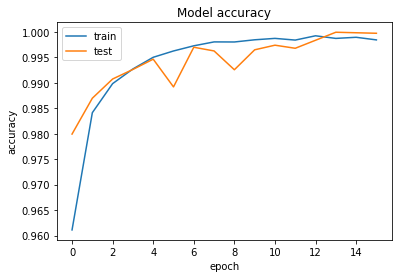

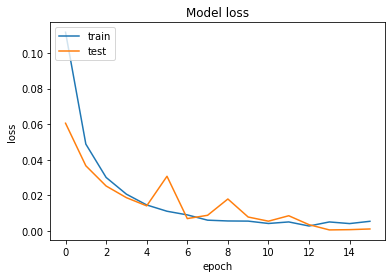

In [ ]:
# summarize history for accuracy
plt.plot(result.history['sparse_categorical_accuracy'])
plt.plot(result.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Save and load network

In [ ]:
### Save
dnn_filename = datafolder + "trained_network_p1_DNN_8people.h5"
model.save(dnn_filename)
print("Model saved to: " + dnn_filename)

### Load
model = tf.keras.models.load_model(datafolder + "trained_network_p1_DNN_8people.h5")
model.summary()

Model saved to: /content/drive/MyDrive/ColabNotebooks/Lisboa_Estancia/Mocap_Trials/trained_network_p1_DNN_8people.h5
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100, 32)           224       
_________________________________________________________________
dense_1 (Dense)              (None, 100, 32)           1056      
_________________________________________________________________
dense_2 (Dense)              (None, 100, 32)           1056      
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 9603      
Total params: 11,939
Trainable params: 11,939
Non-trainable params: 0
_________________________________________________________________


## Predict new data

**Data de las 2 últimas personas para hacer la predicción**

In [ ]:
##Loading csv files
path = r'/content/drive/MyDrive/ColabNotebooks/Lisboa_Estancia/Mocap_Trials/all_Mocapsamples_2people.csv'

df= pd.read_csv(path, skiprows=1, usecols=[0,1,2,3,4,5,6,7], names=['Trial_number','x1', 'y1', 'z1','x2', 'y2', 'z2','label'])
print (df.info)
print(df.shape)

#label outputs (y) Activities
y = pd.read_csv(path, usecols= [7])
print("y = \n",y)
print(y.shape)

#Standarizing
x = []
scaler = StandardScaler()
x = scaler.fit_transform(df)
x = pd.DataFrame(data = df, columns = ['x1','y1','z1','x2','y2','z2'])
print("x = \n",x)
print(x.shape)

#Verifying data shape
x.shape, y.shape

#Counting number of samples per activity
y['label'].value_counts()

### Windowing
print(df.head())
print(df.shape)
#df.loc[3,"y2"]
df.loc[2:4]

dataset_size = df.shape[0] ### how many rows
window_size = 100 ### how many time steps we want to process simultaneously

X_test = np.array([ x.loc[i:(i+window_size-1)].values for i in range(dataset_size-window_size) ])
print(X_test[0:5])
print("shape(X_test) = ", X_test.shape)


y_test= np.array([ y.loc[i].values for i in range(dataset_size-window_size) ])
print(y_test[0:5])
print("shape(y_test) = ", y_test.shape)

<bound method DataFrame.info of        Trial_number        x1        y1  ...         y2         z2  label
0                17  2.409068 -2.002655  ... -32.745707  46.253188      0
1                17  1.954192 -1.748815  ... -26.659342  36.606456      0
2                17  1.446234 -1.475307  ... -20.098610  26.504507      0
3                17  0.904695 -1.181222  ... -13.895110  17.027530      0
4                17  0.366366 -0.873890  ...  -8.963661   8.938339      0
...             ...       ...       ...  ...        ...        ...    ...
67525            19  0.344518 -2.281883  ...  -0.236233  -0.226083      2
67526            19  0.568214 -2.170344  ...  -0.258082  -0.235790      2
67527            19  0.829192 -1.991115  ...  -0.260113  -0.217629      2
67528            19  1.206602 -1.667851  ...  -0.229846  -0.180814      2
67529            19  1.584013 -1.344587  ...  -0.199579  -0.144000      2

[67530 rows x 8 columns]>
(67530, 8)
y = 
        label
0          0
1         

In [ ]:
import tensorflow as tf
import tensorflow.keras
import tensorflow.keras.backend as K

print(tf.version.VERSION)
print(tf.keras.__version__)

2.7.0
2.7.0


In [ ]:
datafolder = '/content/drive/MyDrive/ColabNotebooks/Lisboa_Estancia/Mocap_Trials/'
### Load
model = tf.keras.models.load_model(datafolder + "trained_network_p1_DNN_8people.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100, 32)           224       
                                                                 
 dense_1 (Dense)             (None, 100, 32)           1056      
                                                                 
 dense_2 (Dense)             (None, 100, 32)           1056      
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense_3 (Dense)             (None, 3)                 9603      
                                                                 
Total params: 11,939
Trainable params: 11,939
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#X_test = X_test.reshape((X_test.shape[0], 1, 10, 6))
start_time = time.perf_counter()
y_pred = model.predict(X_test)
end_time = time.perf_counter()

test_size = X_test.shape[0]
total_predict_time = (end_time - start_time) # in seconds
prediction_time_per_sample = round( ( (end_time - start_time)*1000)/test_size ,5) # in milliseconds
print(prediction_time_per_sample)

0.09667


In [ ]:
y_pred = model.predict(X_test)
#y_pred = model.predict_classes(X_test) #Predict classes error using this after january 2021. Suggesting us np way.
print(y_pred.shape)
print(y_pred[0:20])

scores = model.evaluate(X_test, y_test)
print(loss_function," = ",scores[0])
print(score_function," = ",scores[1])

(67430, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
2108/2108 [==============================] - 6s 3ms/step - loss: 5.4124 - sparse_categorical_accuracy: 0.8701
sparse_categorical_crossentropy  =  5.412374496459961
sparse_categorical_accuracy  =  0.8701171875


Testing Accuracy: sparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_cat

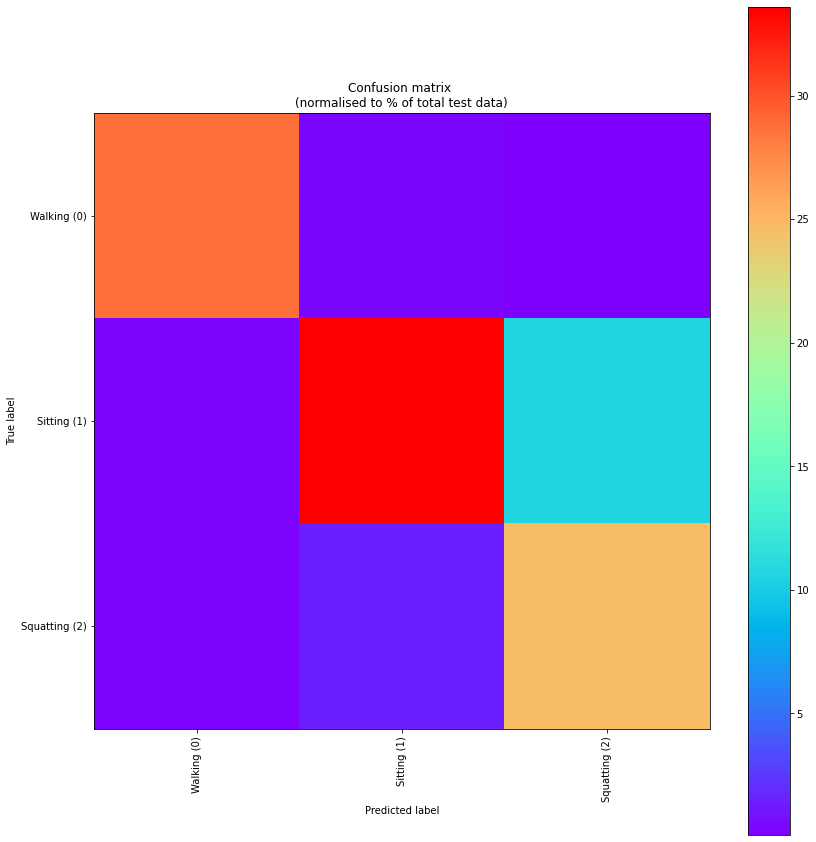

In [ ]:
# Results
import mlxtend

from sklearn import metrics
predictions = y_pred.argmax(1)

print("Testing Accuracy: {}%".format(100*score_function))

print("")
print("Precision: {}%".format(100*metrics.precision_score(y_test, predictions, average="weighted")))
print("Recall: {}%".format(100*metrics.recall_score(y_test, predictions, average="weighted")))
print("f1_score: {}%".format(100*metrics.f1_score(y_test, predictions, average="weighted")))

print("")
print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix)
normalised_confusion_matrix = np.array(confusion_matrix, dtype=np.float32)/np.sum(confusion_matrix)*100

print("")
print("Confusion matrix (normalised to % of total test data):")
print(normalised_confusion_matrix)
print("Note: training and testing data is not equally distributed amongst classes, ")
print("so it is normal that more than a 6th of the data is correctly classifier in the last category.")

# Plot Results:
width = 12
height = 12
plt.figure(figsize=(width, height))
plt.imshow(normalised_confusion_matrix,interpolation='nearest', cmap=plt.cm.rainbow)
plt.title("Confusion matrix \n(normalised to % of total test data)")
plt.colorbar()
LABELS = ['Walking (0)', 'Sitting (1)', 'Squatting (2)']
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, LABELS, rotation=90)
plt.yticks(tick_marks, LABELS)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
import numpy as np

confusion_matrix =np.asarray([[19356,   250,    59],
                              [  154, 22649,  7146],
                              [  168,   981, 16667]])
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)
FP=FP.sum()
FN = FN.sum()
TP = TP.sum()
TN = TN.sum()
print(FP)
print(FN)
print(TP)
print(TN)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print(TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP)
print(TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print(PPV)

8758
8758
58672
126102
0.8701171585347768
0.9350585792673884
0.8701171585347768


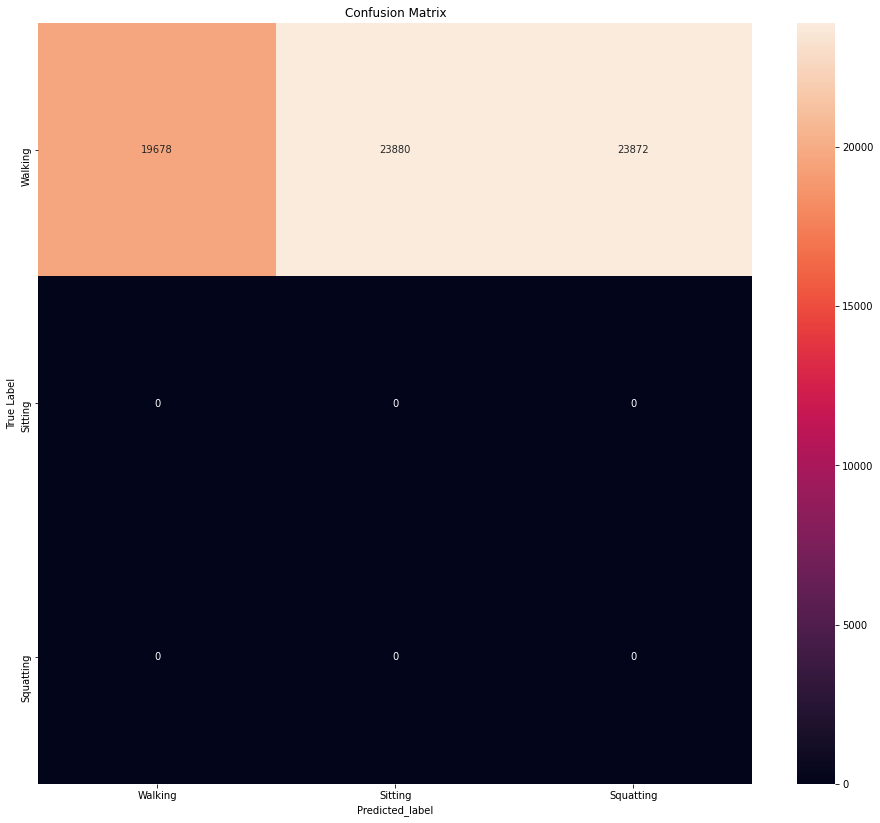

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(y_pred, axis = 1)
confusion_matrix = confusion_matrix(max_test, max_predictions)
LABELS = ['Walking', 'Sitting', 'Squatting']

plt.figure(figsize=(16,14))
sns.heatmap(confusion_matrix, xticklabels = LABELS, yticklabels = LABELS, annot =True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel('Predicted_label')
plt.ylabel('True Label')
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:59: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f797a44d590>)

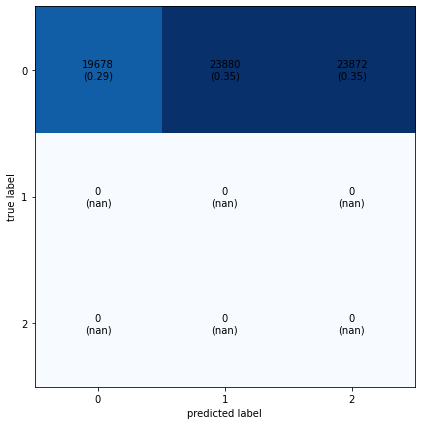

In [ ]:
# Confusion matrix
#!pip3 install mlxtend
import mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import numpy as np

max_test = np.argmax(y_test, axis= 1)
max_predictions = np.argmax(y_pred, axis = 1)
mat = confusion_matrix(max_test, max_predictions)

# plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))